# Plotting salinity, temperature, density and EKE along a section in the Irminger Sea: winter (March) and summer (September) mean

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Hydrographic section coordinates
data = sio.loadmat(datadir+'hydrographic_sections.mat')
lon_section = data['lon'][0]
lat_section = data['lat'][0]
dist = data['distance'][0]
depth = data['depth'][0]
Dist,Depth=np.meshgrid(dist,depth)

# Climatologies
S_clim = data['S_clim']
T_clim = data['T_clim']
sigma_clim = data['sigma_clim']
EKE_clim = data['EKE_clim']

In [3]:
def plotSection(data,ax,cmap,levels,ticks,label,month_no,ext='both',inv_cbar=False):
    sectionplot = ax.contourf(Dist,Depth,data,cmap=cmap,levels=levels,extend=ext)
    cbar = plt.colorbar(sectionplot,ax=ax,ticks=ticks)
    cbar.ax.tick_params(axis='y', which='both', labelsize=14)
    cbar.ax.set_ylabel(label, fontsize=16, labelpad=25)
    if inv_cbar:
        cbar.ax.invert_yaxis()
    CS=ax.contour(Dist,Depth,sigma_clim[month_no],levels=[27.5,27.6,27.7,27.75,27.78,27.8,27.85], 
                  linewidths=0.5, colors='white')
    ax.clabel(CS, inline=1, fontsize=14, fmt='%.2f', colors='white')
    ax.set_xticks(np.arange(0,800e3,100e3))
    ax.set_xticklabels(np.arange(0,800,100))
    ax.set_xlabel('Distance (km)',fontsize=15)
    ax.set_ylim(0,3000)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylabel('Depth (m)',fontsize=15)
    ax.tick_params(axis='both',labelsize=14)
    ax.vlines([120e3,310e3],0,3000,colors='k')

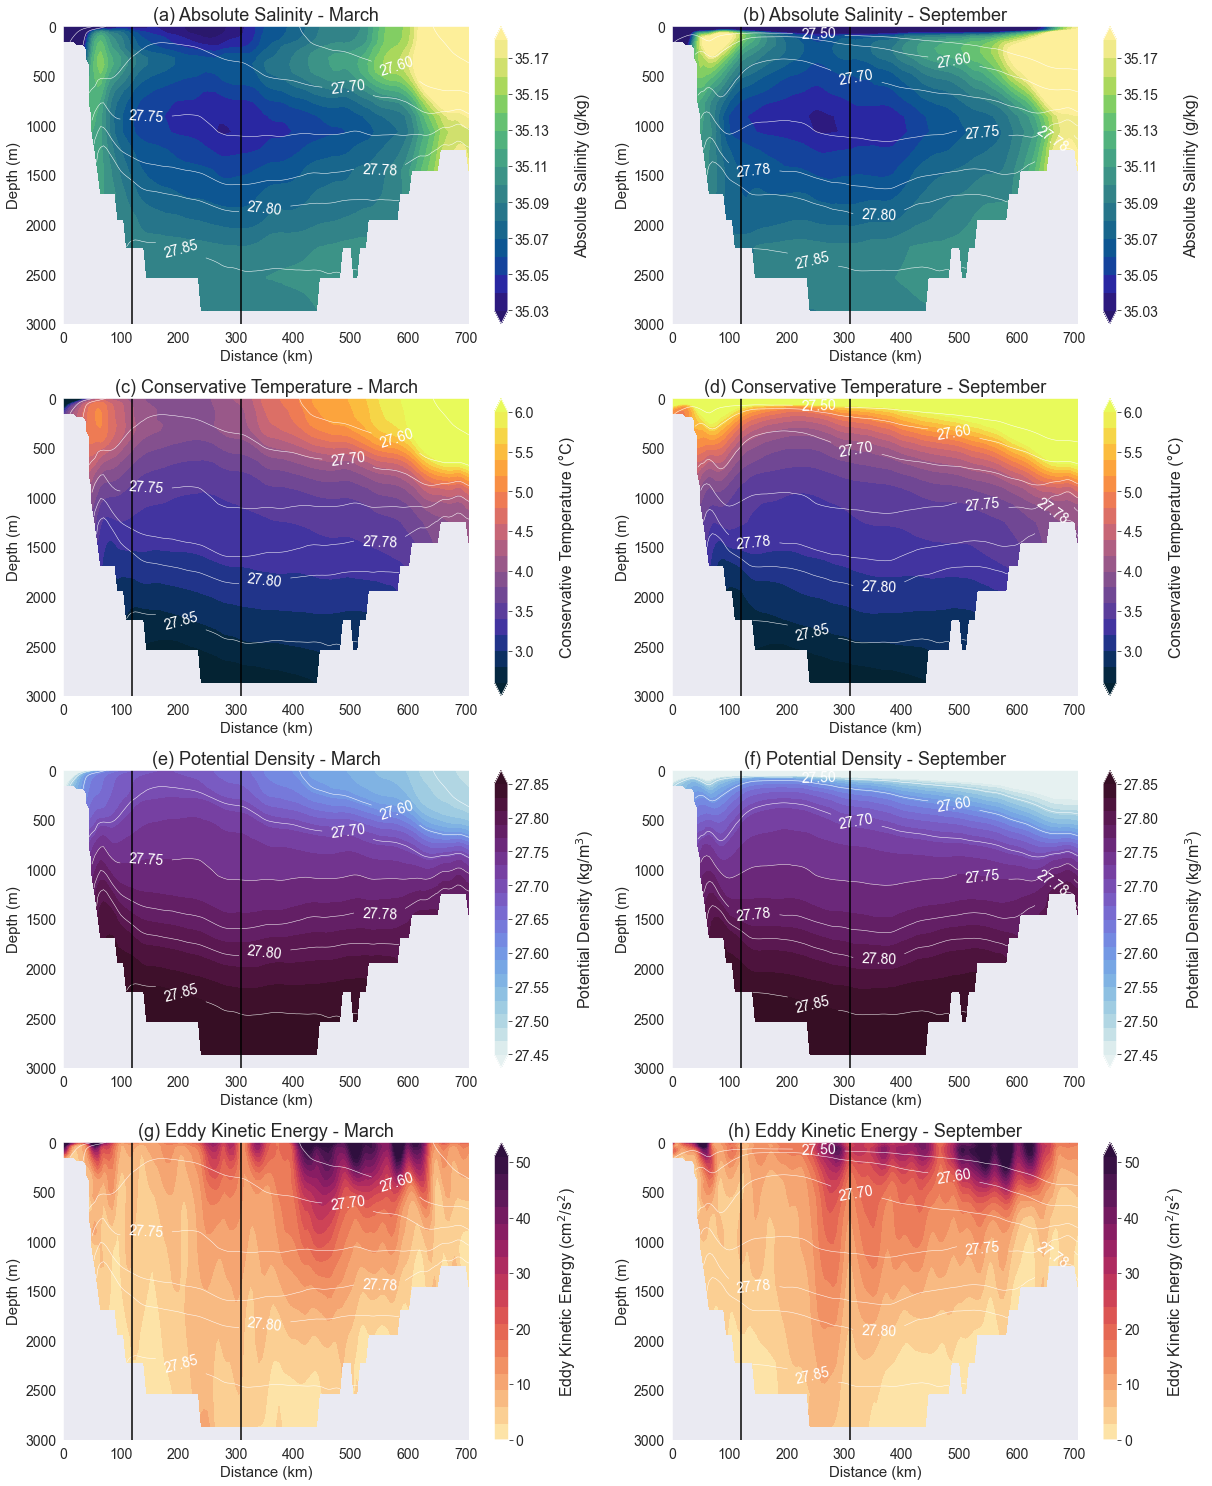

In [4]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(20,26))

# Salinity
plotSection(S_clim[2],ax1,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',month_no=2,inv_cbar=False)
ax1.set_title('(a) Absolute Salinity - March',fontsize=18)
plotSection(S_clim[8],ax2,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',month_no=8,inv_cbar=False)
ax2.set_title('(b) Absolute Salinity - September',fontsize=18)

# Temperature
plotSection(T_clim[2],ax3,'cmo.thermal',levels=np.arange(2.6,6.1,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)',month_no=2)
ax3.set_title('(c) Conservative Temperature - March',fontsize=18)
plotSection(T_clim[8],ax4,'cmo.thermal',levels=np.arange(2.6,6.1,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)',month_no=8)
ax4.set_title('(d) Conservative Temperature - September',fontsize=18)

# Density
plotSection(sigma_clim[2],ax5,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',month_no=2,inv_cbar=False)
ax5.set_title('(e) Potential Density - March',fontsize=18)
plotSection(sigma_clim[8],ax6,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',month_no=8,inv_cbar=False)
ax6.set_title('(f) Potential Density - September',fontsize=18)

# EKE
plotSection(EKE_clim[2]*1e4,ax7,'cmo.matter',levels=np.arange(0,52,3),ticks=np.arange(0,52,10),
            label='Eddy Kinetic Energy (cm$^2$/s$^2$)',month_no=2,ext='max')
ax7.set_title('(g) Eddy Kinetic Energy - March',fontsize=18)
plotSection(EKE_clim[8]*1e4,ax8,'cmo.matter',levels=np.arange(0,52,3),ticks=np.arange(0,52,10),
            label='Eddy Kinetic Energy (cm$^2$/s$^2$)',month_no=8,ext='max')
ax8.set_title('(h) Eddy Kinetic Energy - September',fontsize=18)

plt.subplots_adjust(hspace=0.25)
plt.savefig(figdir+'hydrographic_sections_clim.png',bbox_inches='tight')
plt.show()